In [5]:
import os
import cv2
import matplotlib.pyplot as plt


In [6]:
building = cv2.imread("seg_train/seg_train/buildings/0.jpg")

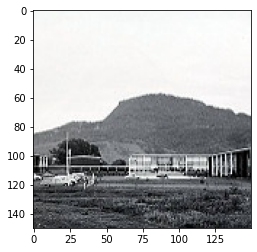

In [7]:
plt.imshow(building)

In [8]:
class_folder_paths = ["seg_train/seg_train/"+x for x in os.listdir("seg_train/seg_train")]

In [9]:
class_folder_paths 

['seg_train/seg_train/buildings',
 'seg_train/seg_train/forest',
 'seg_train/seg_train/glacier',
 'seg_train/seg_train/mountain',
 'seg_train/seg_train/sea',
 'seg_train/seg_train/street']

In [10]:
for class_folder_path in class_folder_paths:
    print(f"{class_folder_path}, {len(os.listdir(class_folder_path))}")

seg_train/seg_train/buildings, 2191
seg_train/seg_train/forest, 2271
seg_train/seg_train/glacier, 2404
seg_train/seg_train/mountain, 2512
seg_train/seg_train/sea, 2274
seg_train/seg_train/street, 2382


In [11]:
TRAIN_DIR = "seg_train/seg_train/"
VAL_DIR = "seg_test/seg_test"

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_data_gen = ImageDataGenerator(horizontal_flip=True)
train_generator = train_data_gen.flow_from_directory(TRAIN_DIR,
                                                    target_size=(150,150),
                                                    color_mode = "rgb",
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    shuffle=True)

valid_data_gen = ImageDataGenerator()
valid_generator = valid_data_gen.flow_from_directory(VAL_DIR,
                                                    target_size=(150,150),
                                                    color_mode = "rgb",
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    shuffle=False)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [14]:
train_generator.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [15]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, GlobalAveragePooling2D, Dropout, Dense

In [16]:
before_mobilenet = Sequential([Input((150,150,3)),
                              Lambda(preprocess_input)])

mobilenet = MobileNet(input_shape=(150,150,3), include_top=False)

after_mobilenet = Sequential([GlobalAveragePooling2D(),
                             Dropout(0.3),
                             Dense(6, activation="softmax")])



In [17]:
model = Sequential([before_mobilenet, mobilenet, after_mobilenet])
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])

In [22]:
model.build(((None, 150, 150, 3)))

In [18]:
#model.summary()
#mobilenet.summary()
#after_mobilenet.summary()

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint

train_cb = ModelCheckpoint("model/", save_best_only= True)
model.fit(train_generator, validation_data=valid_generator, callbacks=[train_cb], epochs=7)

Epoch 1/7
439/439 [==============================] - 1859s 4s/step - loss: 1.1262 - accuracy: 0.6191 - val_loss: 0.4693 - val_accuracy: 0.8423
Epoch 2/7
439/439 [==============================] - 2147s 5s/step - loss: 0.5107 - accuracy: 0.8244 - val_loss: 0.3682 - val_accuracy: 0.8803
Epoch 3/7
439/439 [==============================] - 1937s 4s/step - loss: 0.4128 - accuracy: 0.8608 - val_loss: 0.3315 - val_accuracy: 0.8907
Epoch 4/7
439/439 [==============================] - 13182s 30s/step - loss: 0.3485 - accuracy: 0.8826 - val_loss: 0.3051 - val_accuracy: 0.9003
Epoch 5/7
439/439 [==============================] - 2617s 6s/step - loss: 0.3065 - accuracy: 0.8985 - val_loss: 0.2905 - val_accuracy: 0.9047
Epoch 6/7
439/439 [==============================] - 2304s 5s/step - loss: 0.2784 - accuracy: 0.9034 - val_loss: 0.2806 - val_accuracy: 0.9070
Epoch 7/7
439/439 [==============================] - 2133s 5s/step - loss: 0.2381 - accuracy: 0.9135 - val_loss: 0.2733 - val_accuracy: 0.90

In [1]:
import tensorflow as tf

In [2]:
saved_model_dir = "./model"
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir )
tflite_model = converter.convert()

In [4]:
#tflite_model

In [5]:
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

In [2]:
import cv2
import numpy as np

In [20]:
inp1 = cv2.imread("seg_test/seg_test/forest/20056.jpg")
inp2 = cv2.imread("seg_test/seg_test/forest/20062.jpg")

inps = [inp1, inp2]

In [21]:
inps = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in inps]

In [22]:
import matplotlib.pyplot as plt

#plt.imshow(inps[0])

In [23]:
#plt.imshow(inp1)

In [24]:
#plt.imshow(inps[1])

In [25]:
#plt.imshow(inp2)

In [26]:
inps_arr = np.array(inps)
inps_arr.shape

(2, 150, 150, 3)

In [3]:
import tensorflow.lite as lite

#dir(lite.Interpreter)

In [4]:
#.interpreter as interp
model = lite.Interpreter("model.tflite")
model

In [5]:
type(model)

tensorflow.lite.python.interpreter.Interpreter

In [7]:
lite.allocate_tensors?

Object `lite.allocate_tensors` not found.


In [10]:
model.allocate_tensors()

input_details = model.get_input_details()
input_details

[{'name': 'serving_default_sequential_input:0',
  'index': 0,
  'shape': array([  1, 150, 150,   3]),
  'shape_signature': array([ -1, 150, 150,   3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [11]:
output_details = model.get_output_details()
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 96,
  'shape': array([1, 6]),
  'shape_signature': array([-1,  6]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [31]:
def model_predict(images_arr):
    predictions = [0] * len(images_arr)
    
    for i, val in enumerate(predictions):
        model.set_tensor(input_details[0]['index'], images_arr[i].reshape((1,150,150,3)))
        model.invoke()
        predictions[i] = model.get_tensor(output_details[0]['index']).reshape((6,))
        
    prediction_probabilities = np.array(predictions)
    argmaxs = np.argmax(prediction_probabilities, axis=1)
    
    return argmaxs

In [32]:
model_predict(inps_arr.astype(np.float32))

array([1, 1], dtype=int64)